<a id='top'></a>

# CSCI3022 F21
# Homework 9: Simple and Multiple Linear Regression
***

**Name**: Olivia Golden

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 6 Dec**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

**Shortcuts:**  problems 1-4: Anscombe [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) | [5](p#5)---

In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [1-4 problems: 9 points/ea]


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.  If the model violates any assumptions, consider the following "corrections:"
 - adding higher powers of $x$ to the model to address concavity/curvature/nonlinearity
 - removing outlying data points, and explaining how this affects the model **inference**
 - removing high leverage data points, and explaining how this affects the model **inference**
 - doing nothing, but describing which assumptions might be broken and some possible implications


In [2]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [9 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [3]:
df1=df.loc[df['dataset']=='I']
Y, X = dmatrices('y ~ x', data=df1)
lm1=sm.OLS(Y,X).fit()
lm1.summary()

/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00217
Time:                        17:30:23   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y=.5001x+3.0001


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Originals v. Residuals')

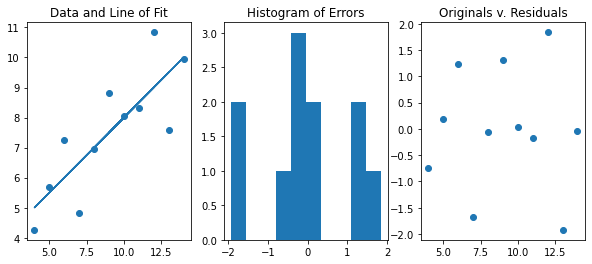

In [4]:
fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(df1['x'], df1['y'])
ax[0].plot(df1['x'], lm1.fittedvalues)
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm1.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(df1['x'], lm1.resid)
ax[2].set_title('Originals v. Residuals')


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

The model looks pretty good.  There are a few outliers but not enough to prove nonnormality. The residuals are rougly normal and there is no obvious structure. 


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another table and set of plots as in parts A and B of the new fit and the new residuals.

Nothing to do to the model.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The model looks fine given a small sample size and a $R^2$ of 96% is good. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [9 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [5]:
df2=df.loc[df['dataset']=='II']
Y, X = dmatrices('y ~ x', data=df2)
lm2=sm.OLS(Y,X).fit()
lm2.summary()

/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00218
Time:                        17:30:23   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y=.5x+3.0009


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Originals v. Residuals')

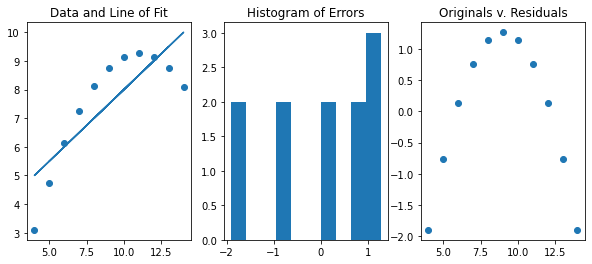

In [6]:
fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(df2['x'], df2['y'])
ax[0].plot(df2['x'], lm2.fittedvalues)
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm2.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(df2['x'], lm2.resid)
ax[2].set_title('Originals v. Residuals')


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

The model is nonlinear and the errors are left-skewed.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

<ipython-input-7-f27b4479f43e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['x2']=df2['x']**2


Text(0.5, 1.0, 'Originals v. Residuals')

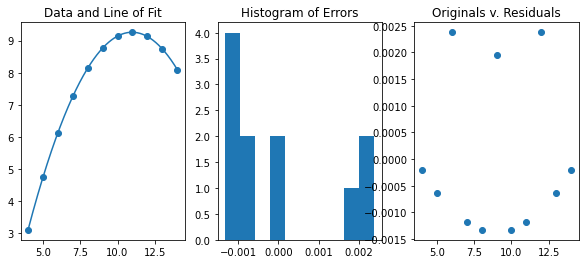

In [7]:
df2['x2']=df2['x']**2
Y, X = dmatrices('y ~ x+x2', data=df2)
lm2=sm.OLS(Y,X).fit()

func=lambda x: lm2.params[0]+lm2.params[1]*x+lm2.params[2]*x**2
xs=np.linspace(np.min(df2['x']), np.max(df2['x']), 1000)

fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(df2['x'], df2['y'])
ax[0].plot(xs, func(xs))
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm2.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(df2['x'], lm2.resid)
ax[2].set_title('Originals v. Residuals')


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

Since the data looks parabolic I added $x^2$ which led to very little error.  No need to make assumptions about error.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [9 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [8]:
df3=df.loc[df['dataset']=='III']
Y, X = dmatrices('y ~ x', data=df3)
lm3=sm.OLS(Y,X).fit()
lm3.summary()

/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00218
Time:                        17:30:23   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y=.4997x+3.0025


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Originals v. Residuals')

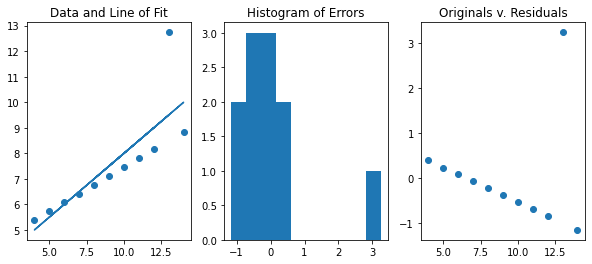

In [9]:
fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(df3['x'], df3['y'])
ax[0].plot(df3['x'], lm3.fittedvalues)
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm3.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(df3['x'], lm3.resid)
ax[2].set_title('Originals v. Residuals')


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

There is a major outlier in the data which creates rightly-skewed errors and an overestimate of almost all the x values.  


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'Originals v. Residuals')

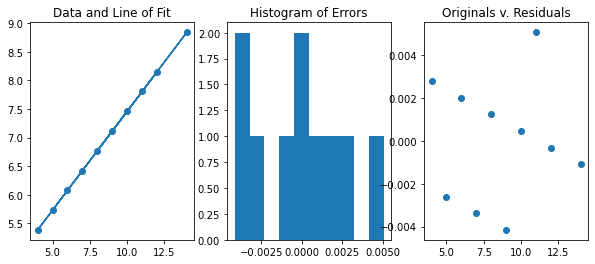

In [10]:
df3=df.loc[df['dataset']=='III']
df3_=df3.drop(labels=24, axis=0)

Y, X = dmatrices('y ~ x', data=df3_)
lm3=sm.OLS(Y,X).fit()
lm3.summary()


fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(df3_['x'], df3_['y'])
ax[0].plot(df3_['x'], lm3.fittedvalues)
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm3.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(df3_['x'], lm3.resid)
ax[2].set_title('Originals v. Residuals')


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

The line looks much better, goes through every data point, and the error has reduced dramatically. These results are under the assumption that theres a low chance a data point is not on the line.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [9 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.

#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [11]:
df4=df.loc[df['dataset']=='IV']
Y, X = dmatrices('y ~ x', data=df4)
lm4=sm.OLS(Y,X).fit()
lm4.summary()

/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00216
Time:                        17:30:24   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y=.4999x+3.0017


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

Text(0.5, 1.0, 'Originals v. Residuals')

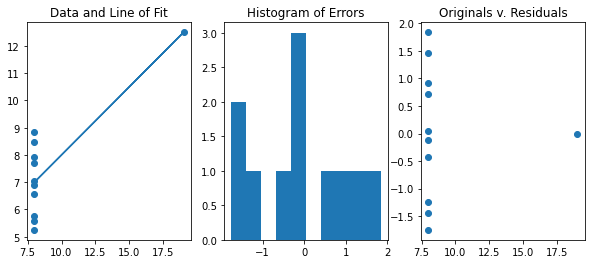

In [12]:
fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(df4['x'], df4['y'])
ax[0].plot(df4['x'], lm4.fittedvalues)
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm4.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(df4['x'], lm4.resid)
ax[2].set_title('Originals v. Residuals')


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

The data is odd in that there is a lot of data around x=8 and little data everywhere else.  It seems like  like y increases as $x$ does, but it is hard to come up with an accurate conclusion about the residuals and variance.  We can say that near x=8 the data might be normal.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

There is nothing to do to the model. There is no acccurate measures of uncertainty. 


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

There was nothing do to since we were provided so little infomration.  It would be better to get more data and recreate the model.

<br>

---
<a/ id='p5'></a>
[Back to top](#top)
## [9 points] Problem 5: Seasonal Data

The data set `pressuretime` is loaded in below, in which a pressure differential between two islands in the sourthern Pacific is recorded monthly.

- `y` is the pressure differential between islands
- `x` is in months of the year.  Whether or not the initial month is January is not provided.

In [13]:
dfpt=pd.read_csv('pressuretime.csv')
dfpt.head()

,y,x
0,12.9,1
1,11.3,2
2,10.6,3
3,11.2,4
4,10.9,5



#### Part A: Numerical Fit.  Make a linear model of the data and print the summary table, and write the final model in a markdown cell.

In [14]:
Y, X = dmatrices('y ~ x', data=dfpt)
lm=sm.OLS(Y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.188
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.277
Time:                        17:30:24   Log-Likelihood:                -444.28
No. Observations:                 168   AIC:                             892.6
Df Residuals:                     166   BIC:                             898.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1396      0.531     19.092      0.000       9.091      11.188
x              0.0059      0.005      1.090      0.277      -0.005       0.017
==============================================================================
Omnibus:                        6.225   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.158
Skew:                          -0.469   Prob(JB):                       0.0460
Kurtosis:                       3.035   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y=.0059x+10.1396


#### Part B: Visualize.  Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.

You may want to zoom in on the x-axis a little to try to notice if there are +/- clumpings of the residuals...

Text(0.5, 1.0, 'Originals v. Residuals')

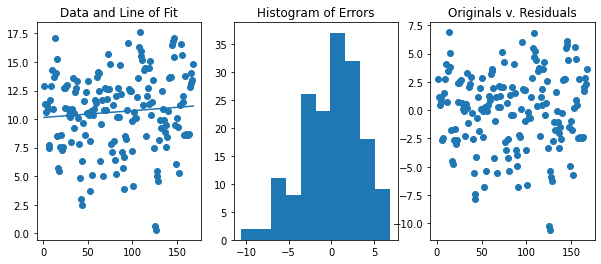

In [15]:
fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(dfpt['x'], dfpt['y'])
ax[0].plot(dfpt['x'], lm.fittedvalues)
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(dfpt['x'], lm.resid)
ax[2].set_title('Originals v. Residuals')


#### Part C: Fixing Periodic data.  Because the data is seasonal, there are often annual cycles that play into the process.  Instead of fitting with a polynomial and higher powers of $x$, we can fit with trigonmetric functions that include the those frequencies/periodicities of the data.

Create two new columns that are $x_s=\sin(x*\frac{2\pi}{12})$ and  $x_c=\cos(x*\frac{2\pi}{12})$.  These represent functions that repeat themselves every **12** months, or annually.

Instead of fitting the usual intercept and slope for 1-D data, instead find the coefficients of the sine and cosine form the model $p=\beta_0+ \beta_s*x_s+\beta_c*x_c$.  (So give `statsmodels` the two new columns and an intercept column, but not the original `x`).

Note: a linear combination of same-phase $\sin$ and $\cos$ is the equivalent to fitting a single function of the form $y=a \sin(x+b)$, or we're already including both a phase shift and an amplitude of a **single** period-12 sinusoid here.  As a rule of thumb, always include both sine and cosine for this type of problem!

In [16]:
import math 
    
dfpt['xs']=np.sin(dfpt['x']*2*math.pi/12)
dfpt['xc']=np.cos(dfpt['x']*2*math.pi/12)

Y, X = dmatrices('y ~ xs+xc', data=dfpt)
lm5=sm.OLS(Y,X).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     57.02
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.50e-19
Time:                        17:30:24   Log-Likelihood:                -400.74
No. Observations:                 168   AIC:                             807.5
Df Residuals:                     165   BIC:                             816.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6417      0.205     52.004      0.000      10.238      11.046
xs             0.4802      0.289      1.659      0.099      -0.091       1.052
xc             3.0529      0.289     10.549      0.000       2.481       3.624
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.222
Skew:                          -0.177   Prob(JB):                        0.543
Kurtosis:                       2.778   Cond. No.                         1.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Part D: Plot the fit, histogram the errors, and plot the errors of the trigonmetic error, as in part B above.  Is it better?

Text(0.5, 1.0, 'Originals v. Residuals')

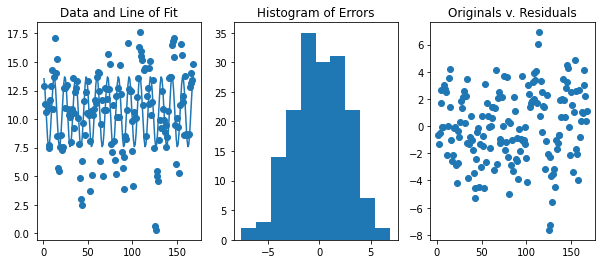

In [17]:
fig, ax= plt.subplots(figsize=(10,4), ncols=3)
ax[0].scatter(dfpt['x'], dfpt['y'])
ax[0].plot(dfpt['x'], lm5.fittedvalues)
ax[0].set_title('Data and Line of Fit')
ax[1].hist(lm5.resid)
ax[1].set_title('Histogram of Errors')
ax[2].scatter(dfpt['x'], lm5.resid)
ax[2].set_title('Originals v. Residuals')

The fit looks better, as it goes through more of the data.  In addition, looking at the middle plot, there seems to be more errors closer to 0. Errors look more normally distributed.

#### Part E (extra credit, up to 5 points):  

It turns out, the *best* trigonometric model for this data includes more sinusoids than just the ones of annual period, above.  If you want to quickly check what **periods** might exist in your data, an **autocorrelation** function (acf) of a (regularly-spaced) data set measures what at what time-lags your data value exhibit patterns.

Use `sm.tsa.stattools.acf` to detect which *other* time lags you might want to use the model this data, in addition to the period of 12 months used above.  To find these:

- Find $x$, the location of the local maxima (after $t=0$) of the .acf function.  Choose the earliest values that are not multiples of one another; e.g. a spike at $t=12$ should also cause a spike at $t=24$, since they're on the same frequency.  Look for clear maxima, not minor perturbations.

- Include both $\sin(2*\pi/x)$ and $\cos(2*\pi/x)$ in your next update of your model (as well as all previously included terms), and check that your adjusted $R^2$ has improved.

- Repeat until there is no additional maxima of the acf that exceed .15, or none of the maxima you try seem to improve the model, or the acf looks relatively unpatterned (centered about 0).

[0.26659748 0.30498965 0.20116916]
[ 4 18 21 24 28 30 32 36]
[21, 30]
[21, 33]
[17, 21, 30, 33]
[17, 21, 30, 33]


/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/oliviagolden/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will be

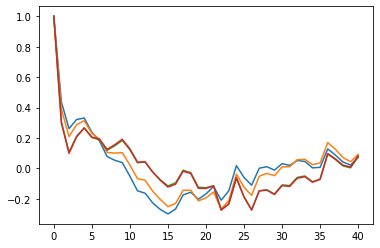

In [18]:
#since this is the original data, we notice a max around 12 (that repeats at 24, 36, etc.)!
acf=sm.tsa.stattools.acf(dfpt['y'])
#plt.plot(acf)
print(acf[11:14])

acf2=sm.tsa.stattools.acf(lm5.resid)
plt.plot(acf2)

import scipy

maxi1 = scipy.signal.argrelextrema(acf2, np.greater)[0]
print(maxi1)

def get_max(maximums):
    new_max=[]
    for i in range(len(maximums)):
        t=0
        for j in range(0, len(maximums)):
            if (i!=j):
                if(maximums[j]%maximums[i]==0 or maximums[i]%maximums[j]==0):
                    t+=1
                    continue
        if (t==0):
            new_max.append(maximums[i])
    return new_max
    
trial1=get_max(maxi1)
print(trial1)
    
dfpt['xs1']=np.sin(dfpt['x']*2*math.pi/trial1[0])
dfpt['xc1']=np.cos(dfpt['x']*2*math.pi/trial1[0])
dfpt['xs2']=np.sin(dfpt['x']*2*math.pi/trial1[1])
dfpt['xc2']=np.cos(dfpt['x']*2*math.pi/trial1[1])

Y, X = dmatrices('y ~ xs+xc+xs1+xc1+xs2+xc2', data=dfpt)
lm6=sm.OLS(Y,X).fit()

acf3=sm.tsa.stattools.acf(lm6.resid)
plt.plot(acf3)
maxi2 = scipy.signal.argrelextrema(acf3, np.greater)[0]

trial2=get_max(maxi2)
print(trial2)

dfpt['xs3']=np.sin(dfpt['x']*2*math.pi/trial2[0])
dfpt['xc3']=np.cos(dfpt['x']*2*math.pi/trial2[0])
dfpt['xs4']=np.sin(dfpt['x']*2*math.pi/trial2[1])
dfpt['xc4']=np.cos(dfpt['x']*2*math.pi/trial2[1])

Y, X = dmatrices('y ~ xs+xc+xs1+xc1+xs2+xc2+xs3+xc3+xs4+xc4', data=dfpt)
lm7=sm.OLS(Y,X).fit()

acf4=sm.tsa.stattools.acf(lm7.resid)
plt.plot(acf4)
maxi3 = scipy.signal.argrelextrema(acf4, np.greater)[0]

trial3=get_max(maxi3)
print(trial3)

dfpt['xs5']=np.sin(dfpt['x']*2*math.pi/trial3[0])
dfpt['xc5']=np.cos(dfpt['x']*2*math.pi/trial3[0])
dfpt['xs6']=np.sin(dfpt['x']*2*math.pi/trial3[1])
dfpt['xc6']=np.cos(dfpt['x']*2*math.pi/trial3[1])
dfpt['xs7']=np.sin(dfpt['x']*2*math.pi/trial3[2])
dfpt['xc7']=np.cos(dfpt['x']*2*math.pi/trial3[2])
dfpt['xs8']=np.sin(dfpt['x']*2*math.pi/trial3[3])
dfpt['xc8']=np.cos(dfpt['x']*2*math.pi/trial3[3])


Y, X = dmatrices('y ~ xs+xc+xs1+xc1+xs2+xc2+xs3+xc3+xs4+xc4+xc5+xs5+xs6+xc6+xs7+xc7+xs8+xc8', data=dfpt)
lm8=sm.OLS(Y,X).fit()

acf5=sm.tsa.stattools.acf(lm8.resid)
plt.plot(acf5)
maxi4 = scipy.signal.argrelextrema(acf5, np.greater)[0]

trial4=get_max(maxi4)
print(trial4) #maxima will not improve model


